In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.feature_extraction import DictVectorizer
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
url1="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet"
url2="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet"

In [3]:
def wrangle(filepath):
    df=pd.read_parquet(filepath)
    df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
    df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])
    df["duration"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]
    df["duration"]=df["duration"].apply(lambda dt:dt.total_seconds()/60)
    df=df[((df.duration>=1) & (df.duration<=60))]
    return df
    

In [4]:
df_train=wrangle(url1)
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.00,0.97,1.00,N,161,141,2,9.30,1.00,0.50,0.00,0.00,1.00,14.30,2.50,0.00,8.43
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.00,1.10,1.00,N,43,237,1,7.90,1.00,0.50,4.00,0.00,1.00,16.90,2.50,0.00,6.32
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.00,2.51,1.00,N,48,238,1,14.90,1.00,0.50,15.00,0.00,1.00,34.90,2.50,0.00,12.75
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.00,1.90,1.00,N,138,7,1,12.10,7.25,0.50,0.00,0.00,1.00,20.85,0.00,1.25,9.62
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.00,1.43,1.00,N,107,79,1,11.40,1.00,0.50,3.28,0.00,1.00,19.68,2.50,0.00,10.83


In [5]:
df_val=wrangle(url2)
df_val.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.00,0.30,1.00,N,142,163,2,4.40,3.50,0.50,0.00,0.00,1.00,9.40,2.50,0.00,1.68
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.00,18.80,1.00,N,132,26,1,70.90,2.25,0.50,0.00,0.00,1.00,74.65,0.00,1.25,32.08
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.00,3.22,1.00,N,161,145,1,17.00,1.00,0.50,3.30,0.00,1.00,25.30,2.50,0.00,13.30
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.00,5.10,1.00,N,148,236,1,21.90,3.50,0.50,5.35,0.00,1.00,32.25,2.50,0.00,14.63
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.00,8.90,1.00,N,137,244,1,41.50,3.50,0.50,3.50,0.00,1.00,50.00,2.50,0.00,27.95


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

/tmp/ipykernel_37267/4177815781.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train["duration"]);


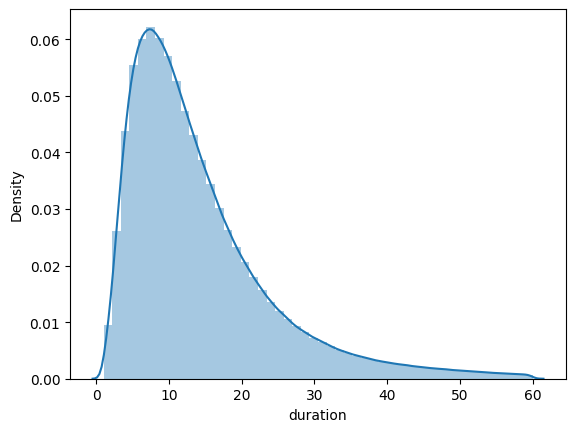

In [7]:
sns.distplot(df_train["duration"]);

In [8]:
df_train["duration"].describe(percentiles=[0.5,0.6,0.7,0.8,0.9,0.95,0.98,0.99])

count   3009173.00
mean         14.20
std           9.94
min           1.00
50%          11.55
60%          13.73
70%          16.45
80%          20.32
90%          27.27
95%          34.77
98%          44.50
99%          50.27
max          60.00
Name: duration, dtype: float64

In [9]:
df_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [10]:
categorical=['PULocationID', 'DOLocationID']
df_train[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [11]:
df_train[categorical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [13]:
train_dicts=df_train[categorical].to_dict(orient="records")
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical].to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [14]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 2)>

In [16]:
target="duration"
y_train=df_train[target].values

y_val=df_val[target].values

In [17]:
model=LinearRegression ()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred=model.predict(X_val)

/tmp/ipykernel_37267/4267261415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="predicted")
/tmp/ipykernel_37267/4267261415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label="original")


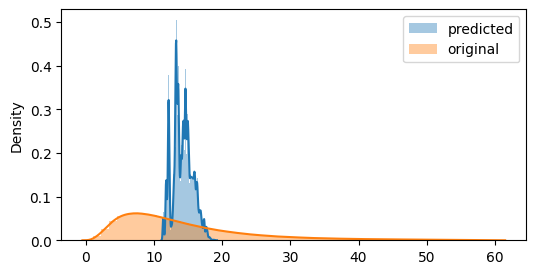

In [20]:
plt.figure(figsize=(6,3))
sns.distplot(y_pred, label="predicted")
sns.distplot(y_train, label="original")
plt.legend()
             

In [23]:
mean_squared_error(y_val, y_pred)

99.27347632368074

In [24]:
(np.sqrt(np.mean(np.square(y_val -  y_pred)))) #rmse

np.float64(9.963607595829973)

In [28]:
#on trin
y_pred1=model.predict(X_train)

In [29]:
(np.sqrt(np.mean(np.square(y_train -  y_pred1)))) #rmse

np.float64(9.835277713631873)